In [1]:
import pandas as pd

In [32]:
# return sample data
df = pd.read_csv('data/TG_STAID000001.txt', skiprows = 20, parse_dates = ['    DATE'])
df

,STAID,SOUID,DATE,TG,Q_TG
0,1,35381,1860-01-01,21,0
1,1,35381,1860-01-02,46,0
2,1,35381,1860-01-03,31,0
3,1,35381,1860-01-04,37,0
4,1,35381,1860-01-05,31,0
...,...,...,...,...,...
59316,1,35381,2022-05-27,-9999,9
59317,1,35381,2022-05-28,-9999,9
59318,1,35381,2022-05-29,-9999,9
59319,1,35381,2022-05-30,-9999,9


In [14]:
# return columns
df.columns

Index(['STAID', ' SOUID', '    DATE', '   TG', ' Q_TG'], dtype='object')

In [31]:
# return specified columns
df[['STAID', '   TG']][:11]

,STAID,TG
0,1,21
1,1,46
2,1,31
3,1,37
4,1,31
5,1,16
6,1,5
7,1,-27
8,1,-4
9,1,-17


In [53]:
# filter data frame
df_filtered = df.loc[df[' Q_TG'] == 0]
df_filtered

,STAID,SOUID,DATE,TG,Q_TG
0,1,35381,1860-01-01,21,0
1,1,35381,1860-01-02,46,0
2,1,35381,1860-01-03,31,0
3,1,35381,1860-01-04,37,0
4,1,35381,1860-01-05,31,0
...,...,...,...,...,...
53655,1,35381,2006-11-26,80,0
53656,1,35381,2006-11-27,70,0
53657,1,35381,2006-11-28,71,0
53658,1,35381,2006-11-29,63,0


In [27]:
# return average temp
df_filtered['   TG'].mean() / 10

6.362732580037664

In [28]:
# return max temp
df_filtered['   TG'].max() / 10

26.2

In [29]:
# return min temp
df_filtered['   TG'].min() / 10

-23.4

<Axes: >

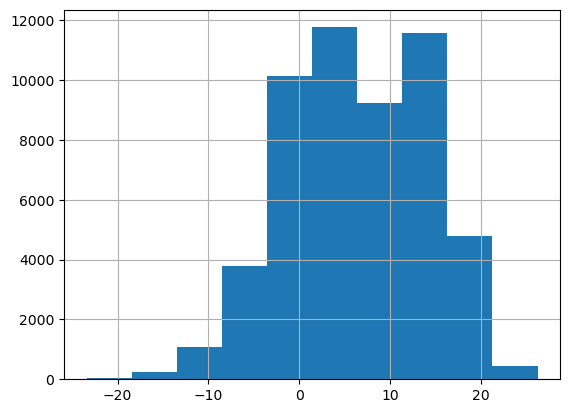

In [36]:
# divide temp col by 10 (per doc) and display histogram
(df_filtered['   TG'] / 10).hist()

In [41]:
# return temp for specified date
df_filtered.loc[df_filtered['    DATE'] == '2006-11-26']['   TG'].squeeze() / 10

8.0

In [42]:
# return date for max temp
df_filtered.loc[df_filtered['   TG'] == df['   TG'].max()]['    DATE'].squeeze()

Timestamp('1868-08-16 00:00:00')

In [54]:
# apply division by 10 to df
df_filtered['   TG'] = df_filtered['   TG'] / 10
df_filtered

/var/folders/mj/lnt7y9cd6fz98p08_l0pntj00000gn/T/ipykernel_70041/302298087.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['   TG'] = df_filtered['   TG'] / 10


,STAID,SOUID,DATE,TG,Q_TG
0,1,35381,1860-01-01,2.1,0
1,1,35381,1860-01-02,4.6,0
2,1,35381,1860-01-03,3.1,0
3,1,35381,1860-01-04,3.7,0
4,1,35381,1860-01-05,3.1,0
...,...,...,...,...,...
53655,1,35381,2006-11-26,8.0,0
53656,1,35381,2006-11-27,7.0,0
53657,1,35381,2006-11-28,7.1,0
53658,1,35381,2006-11-29,6.3,0


In [55]:
# create transformed column
df_filtered['TG FAR'] = df_filtered['   TG'] * (9/5) + 32
df_filtered

/var/folders/mj/lnt7y9cd6fz98p08_l0pntj00000gn/T/ipykernel_70041/1613586021.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['TG FAR'] = df_filtered['   TG'] * (9/5) + 32


,STAID,SOUID,DATE,TG,Q_TG,TG FAR
0,1,35381,1860-01-01,2.1,0,35.78
1,1,35381,1860-01-02,4.6,0,40.28
2,1,35381,1860-01-03,3.1,0,37.58
3,1,35381,1860-01-04,3.7,0,38.66
4,1,35381,1860-01-05,3.1,0,37.58
...,...,...,...,...,...,...
53655,1,35381,2006-11-26,8.0,0,46.40
53656,1,35381,2006-11-27,7.0,0,44.60
53657,1,35381,2006-11-28,7.1,0,44.78
53658,1,35381,2006-11-29,6.3,0,43.34


<Axes: >

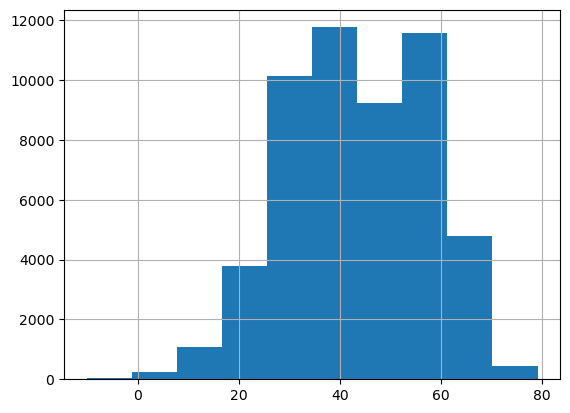

In [56]:
# display histogram of farenhefahrenheitignt temps
df_filtered['TG FAR'].hist()

<Axes: xlabel='    DATE'>

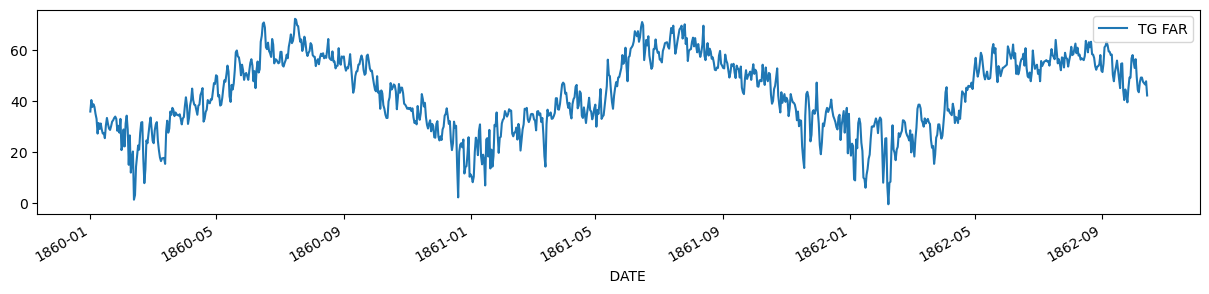

In [58]:
# plot daily temp for first 1,000 records
df_filtered[:1001].plot(x = '    DATE', y = 'TG FAR', figsize = (15, 3))